In [ ]:
import sys
import os

# Add the project directory of "tests" to sys.path
sys.path.append(os.path.abspath("/Users/workspace/Software/Layered_Tank_Simulation/CherenkovSim/"))

In [3]:
import ROOT
import numpy as np 
import matplotlib as mpl
from matplotlib import pyplot as plt
import astropy.units as u

In [7]:
cross_section_path = '/Users/workspace/Software/Layered_Tank_Simulation/CherenkovSim/cherenkov_sim/water_gamma_cross_section.txt'

energy , sigma_compt, sigma_pp = np.loadtxt(cross_section_path, skiprows=3, usecols=(0,1,2), unpack=True)
sigma_tot = sigma_compt + sigma_pp

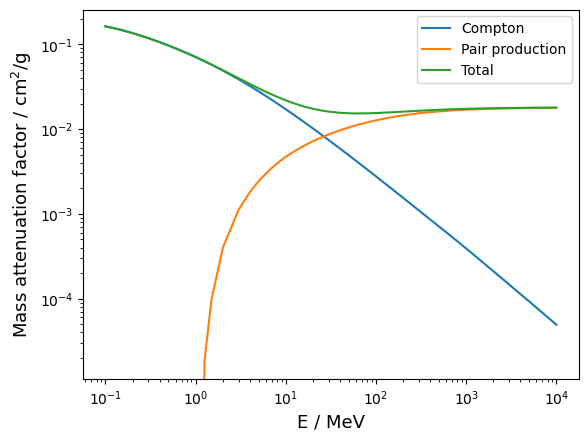

In [13]:
plt.plot(energy, sigma_compt, label='Compton')
plt.plot(energy, sigma_pp, label = 'Pair production')
plt.plot(energy, sigma_tot, label = 'Total')

plt.xlabel('E / MeV',size=13)
plt.ylabel(r'Mass attenuation factor / cm$^2$/g',size=13)

plt.xscale('log')
plt.yscale('log')
plt.legend()

In [28]:
e = 12 # MeV 
mu_compton = np.interp(e, energy, sigma_compt) # Interpolate table values
mu_pp = np.interp(e, energy, sigma_pp) # Interpolate table values

lambda_compt = 1 / mu_compton * u.cm
lambda_pair = 1 / mu_pp * u.cm
print('Attenuation factors = ',mu_compton, mu_pp,'cm^2/g')
print('Mean path length = ',lambda_compt, lambda_pair)



Attenuation factors =  0.01496 0.005341 cm^2/g
Mean path length =  66.84491978609626 cm 187.23085564501028 cm


In [26]:
l_compt = np.random.exponential(lambda_compt.value, size=1)[0] * u.cm  
l_pair = np.random.exponential(lambda_pair.value, size=1)[0] * u.cm  

print('Extracted path length = ',l_compt, l_pair)
print('The lowest is ',np.minimum(l_compt.value, l_pair.value))

Extracted path length =  229.20954013553896 cm 81.29322035097667 cm
The lowest is  81.29322035097667
